**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

Изменения в функции:
1. ввел args параметр - различные лямбда
2. Вывод итоговых коэффициентов после итераций для каждой лябда
3. Отрисовка графика зависимостей весов от лямбда

In [5]:
def gradient_descent_reg_l2(X, y, iterations=300, eta=1e-2, *reg):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for el in reg:
        for i in range(0, iterations):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)

            dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
            dReg = el * W # градиент регуляризации

            W -= eta * (dQ + dReg)
        print(W)
        plt.plot(W)  # построение графика

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [7]:
#коэффициенты лямбда
reg = [i/10 for i in range(1, 25, 5)]

reg

[0.1, 0.6, 1.1, 1.6, 2.1]

[53.71632526  5.25736326  1.77042362  5.16234271]
[43.46532824  4.5245137   2.418405    4.16546938]
[36.45216636  3.91805729  2.67084458  3.61650398]
[31.38897352  3.51833883  2.63969405  3.28828187]
[27.56098905  3.21496181  2.54379083  3.0359469 ]


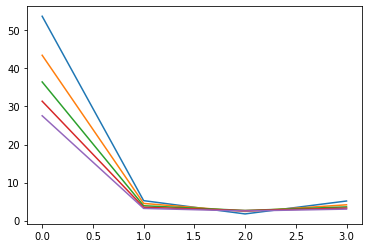

In [8]:
gradient_descent_reg_l2(X_st, y, 300, 0.01, *reg)

**Вывод**

С увеличение лямбда, веса снижаются все примерно пропорционально: при роста с 0.1 до 2 в 2 раза. Для 3-го фактора при увеличении лямбда с 0.1 до 0.6, а потом до 1.1 вес вначале вырос с 1.95 до 2.4 и 2.67, но затем стал снижаться.

Если лямбда маленькая, то и смещение будет маленьким, и весь смысл регуляризации так же будет минимальным, значение ближе к 2 уже существенно смещает систему и она может не обучиться.

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

$$J = (Y - X_W)^T(Y - X_W)+\lambda|w|$$

Возьмем производную по весам и приравняем нулю:

$$\frac{d J}{d w} = -2X^T Y + 2X^T X_W + \lambda sign(w) = 0$$

Функция sign(x) возвращает единицу, если x>0,  минус единицу, если x<0, и нуль, если x=0. 

In [9]:
def gradient_descent_reg_l1(X, y, iterations=300, eta=1e-2, *reg):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for el in reg:
        for i in range(0, iterations):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)

            dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
            dReg = el * np.sign(W) # градиент регуляризации

            W -= eta * (dQ + dReg)
        print(W)
        plt.plot(W)  # построение графика

[56.31799363  5.5431805   2.3253583   4.49555862]
[56.20027522  5.82763196  1.00035303  5.29375039]
[55.95058377  5.86053123  0.2818413   5.71132417]
[5.57005845e+01 5.76084037e+00 4.97011695e-03 5.82586441e+00]
[5.54505845e+01 5.59133987e+00 3.47491563e-02 5.70320918e+00]


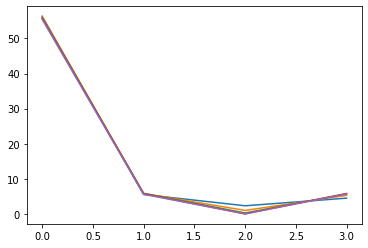

In [10]:
gradient_descent_reg_l1(X_st, y, 300, 0.01, *reg)

***3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Да можно, мы просто приводим данные к одному масштабу.

***4. Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

**Стохастический градиентный спуск**

In [11]:
# сгенерируем набор данных
X_new, Y_new, coef_new = make_regression(n_samples=500, n_features=3, n_informative=2, n_targets=1, 
                                      noise=3, coef=True, random_state=2)
X_new[:, 0] *= 10
display(X_new, Y_new, coef_new)

array([[ -4.54227855,   0.30262934,   1.33556617],
       [  6.46350324,   0.17514072,  -0.5609986 ],
       [-12.21429165,  -0.70742089,  -1.13431848],
       ...,
       [-16.16535403,  -0.88719727,   0.2916135 ],
       [  6.96361151,   0.05758565,   0.41197569],
       [-11.98140378,  -1.90382114,   1.18604868]])

array([  93.74211925,  -10.21982948, -125.6072437 ,   -2.48907443,
        -90.38227541,  120.32007941,  -36.6458768 ,   80.35160848,
       -103.78469617,   -0.37828699,  -41.16684467,  -85.35207694,
        -87.80228902,  -67.07726964,  -46.081507  , -110.15582216,
       -126.24194486, -125.1887548 ,  -92.35854614,    2.74621163,
       -104.75760731,  -63.84970558,  -76.60616413,  -16.79346834,
        -89.37799174,  -75.08849284, -161.84140926, -227.29043967,
         99.98200972,  122.42422488,  202.39426609,  -72.00535351,
         73.82143342,   18.63320197, -144.80714225,   62.86877707,
         80.4791592 ,   37.63382016,  -38.34373257,  266.16228301,
        161.64886457,  118.3841905 ,  -46.18445869,  -98.77329324,
         58.05117356, -114.24221309, -187.38352886,   84.79909369,
       -149.8042225 ,  218.55597755,   77.87590868,  -89.33199233,
         43.83683472, -106.6742638 ,  -26.56108354,  -53.71745152,
         66.31392001, -120.86248698,  128.03692618,   74.81022

array([ 0.        , 96.78882977, 48.88386483])

In [12]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X_new, axis=0)
stds = np.std(X_new, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.03357183, -0.05018849, -0.06073649])

array([10.17653642,  0.9920129 ,  0.98500829])

In [13]:
X_new.shape[0]

500

In [14]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X_new.shape[0]):
    for j in range(X_new.shape[1]):
        X_new[i][j] = (X_new[i][j] - means[j]) / stds[j]

In [15]:
X_new

array([[-0.44304924,  0.35565851,  1.41755423],
       [ 0.63843677,  0.22714343, -0.50787604],
       [-1.1969416 , -0.66252404, -1.08992179],
       ...,
       [-1.58519378, -0.84374787,  0.35771272],
       [ 0.68758004,  0.10864188,  0.47990681],
       [-1.17405682, -1.868557  ,  1.26576109]])

In [16]:
means = np.mean(X_new, axis=0)
stds = np.std(X_new, axis=0)

display(means, stds)

array([-1.28785871e-17,  6.26165786e-17,  9.32587341e-18])

array([1., 1., 1.])

In [17]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [38]:
%%time
# инициализируем начальный вектор весов
w_new = np.zeros(X_new.shape[1])

# список векторов весов после каждой итерации
w_list = [w_new.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X_new.shape[0], size=1)
    
    y_pred = np.dot(X_new[train_ind], w_new)
    new_w = w_new - eta * 2 / Y_new[train_ind].shape[0] * np.dot(X_new[train_ind].T, y_pred - Y_new[train_ind])

    weight_dist = np.linalg.norm(new_w - w_new, ord=2)
 
    error = mserror(X_new, new_w, Y_new)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w_new = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [36.23826281 36.02157202 69.29364931], MSE = 5670.79
Iteration #100: W_new = [ 1.34743075 93.34540863 49.18780593], MSE = 81.74
Iteration #200: W_new = [1.30867821e-02 1.03415855e+02 4.47611484e+01], MSE = 132.4
Iteration #300: W_new = [-3.54978035 89.54818852 37.44293963], MSE = 227.04
Iteration #400: W_new = [  5.75837442 101.61870706  42.98133177], MSE = 153.08
Iteration #500: W_new = [  3.70408123 100.47024603  45.7295539 ], MSE = 105.48
Iteration #600: W_new = [ 3.19702323 89.80509014 43.95369699], MSE = 130.58
Iteration #700: W_new = [ 2.13915364 93.56325303 50.89466634], MSE = 92.45
Iteration #800: W_new = [-1.9514945  92.57588787 48.29424608], MSE = 85.57
Iteration #900: W_new = [-4.30534213 97.7720844  46.46957588], MSE = 92.43
Iter 1000: error - 128.8195476811197, weights: [-6.99212238 96.74408956 51.2736961 ]
В случае использования стохастического градиентного спуска ошибка составляет 128.8195
Wall time: 139 ms


Text(0, 0.5, 'MSE')

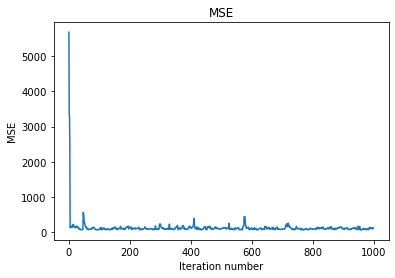

In [39]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Градиентный спуск**

In [ ]:
# возьмем нулевые начальные веса
w_new = np.zeros(X_new.shape[1])

In [41]:
%%time
# список векторов весов после каждой итерации
w_list = [w_new.copy()]

# список значений ошибок после каждой итерации
errors_gb = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X_new, w_new)
    dQ = 2 / Y_new.shape[0] * np.dot(X_new.T, y_pred - Y_new)
    new_w = w_new - eta * dQ
    weight_dist = np.linalg.norm(new_w - w_new, ord=2)
    error = mserror(X_new, new_w, Y_new)
    
    w_list.append(new_w.copy())
    errors_gb.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    w_new = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gb[-1], 4)}')

Iter 0: error - 126.5566668011588, weights: [-6.85657534 96.73144169 51.2080052 ]
Iter 1: error - 124.37988765190296, weights: [-6.72367627 96.71904016 51.14348447]
Iter 2: error - 122.28593015233288, weights: [-6.59337332 96.70688012 51.08011331]
Iter 3: error - 120.27163933985071, weights: [-6.46561568 96.69495679 51.01787149]
Iter 4: error - 118.33398059096449, weights: [-6.3403535  96.68326551 50.95673912]
Iter 5: error - 116.47003502481216, weights: [-6.21753795 96.67180169 50.89669664]
Iter 6: error - 114.67699508251435, weights: [-6.09712112 96.66056085 50.83772487]
Iter 7: error - 112.95216027562115, weights: [-5.97905608 96.64953859 50.77980491]
Iter 8: error - 111.29293309717607, weights: [-5.86329678 96.6387306  50.72291823]
Iter 9: error - 109.6968150891621, weights: [-5.74979809 96.62813266 50.66704661]
Iter 10: error - 108.16140306034663, weights: [-5.63851579 96.61774063 50.61217214]
Iter 11: error - 106.6843854487586, weights: [-5.52940648 96.60755046 50.55827722]
Iter 

Iter 417: error - 69.28148349583802, weights: [-4.10928773e-02  9.60866076e+01  4.76220328e+01]
Iter 418: error - 69.28148326719487, weights: [-4.10549747e-02  9.60866029e+01  4.76220037e+01]
Iter 419: error - 69.28148304715995, weights: [-4.10178021e-02  9.60865982e+01  4.76219751e+01]
Iter 420: error - 69.28148283540861, weights: [-4.09813452e-02  9.60865937e+01  4.76219470e+01]
Iter 421: error - 69.28148263162936, weights: [-4.09455905e-02  9.60865892e+01  4.76219195e+01]
Iter 422: error - 69.28148243552181, weights: [-4.09105242e-02  9.60865848e+01  4.76218924e+01]
Iter 423: error - 69.28148224679715, weights: [-4.08761331e-02  9.60865805e+01  4.76218659e+01]
Iter 424: error - 69.28148206517709, weights: [-4.08424042e-02  9.60865762e+01  4.76218399e+01]
Iter 425: error - 69.28148189039437, weights: [-4.08093248e-02  9.60865721e+01  4.76218143e+01]
Iter 426: error - 69.28148172219144, weights: [-4.07768822e-02  9.60865680e+01  4.76217892e+01]
Iter 427: error - 69.28148156032059, wei

Iter 839: error - 69.28147742111236, weights: [-3.91228624e-02  9.60863481e+01  4.76204695e+01]
Iter 840: error - 69.28147742111238, weights: [-3.91228517e-02  9.60863481e+01  4.76204695e+01]
Iter 841: error - 69.28147742111241, weights: [-3.91228411e-02  9.60863481e+01  4.76204695e+01]
Iter 842: error - 69.28147742111233, weights: [-3.91228308e-02  9.60863481e+01  4.76204695e+01]
Iter 843: error - 69.28147742111233, weights: [-3.91228207e-02  9.60863480e+01  4.76204695e+01]
Iter 844: error - 69.28147742111227, weights: [-3.91228108e-02  9.60863480e+01  4.76204695e+01]
Iter 845: error - 69.28147742111223, weights: [-3.91228010e-02  9.60863480e+01  4.76204695e+01]
Iter 846: error - 69.28147742111229, weights: [-3.91227915e-02  9.60863480e+01  4.76204695e+01]
Iter 847: error - 69.28147742111227, weights: [-3.91227821e-02  9.60863480e+01  4.76204695e+01]
Iter 848: error - 69.28147742111223, weights: [-3.91227729e-02  9.60863480e+01  4.76204695e+01]
Iter 849: error - 69.28147742111216, wei

Text(0, 0.5, 'MSE')

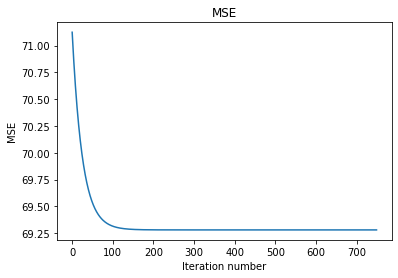

In [24]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_gb)), errors_gb)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Ошибки на одном графике**

Text(0, 0.5, 'MSE')

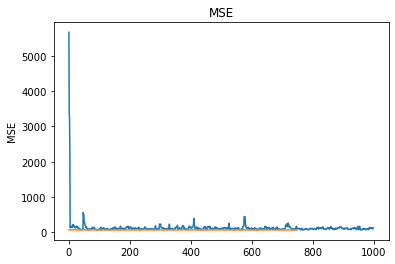

In [40]:
plt.plot(range(len(errors)), errors, errors_gb)
plt.title('MSE')
plt.ylabel('MSE')

**Выводы**

График в СГС неровный, скорост схождения хуже, чем в ГС, однако даже на выборке в 500 скорость выполнения в 2.7 раза больше. 